In [1]:
# Idag: Exploratory Data Analysis (EDA)
# vi vill undesöka vårt dataset, och se hur de olika feauturesen föhåller sig till varandra
# vi kommer att använda oss av pandas, matplotlib sklearn och seaborn

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
import numpy as np


In [39]:
# Importera datan, och gör den till en dataframe
iris = datasets.load_iris()
df = pd.DataFrame(data= np.c_[iris['data'], iris['target_names'][iris['target']]], columns= iris['feature_names'] + ['species'])

# Casta om datatyperna till numeriska
df['sepal length (cm)'] = pd.to_numeric(df['sepal length (cm)'])
df['sepal width (cm)'] = pd.to_numeric(df['sepal width (cm)'])
df['petal length (cm)'] = pd.to_numeric(df['petal length (cm)'])
df['petal width (cm)'] = pd.to_numeric(df['petal width (cm)'])

In [40]:
# inspektera datan
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [41]:
# äntligen lite Exploratory Data Analysis (EDA)
# vi börjar med lite pandas funktioner

# visar information om datan, som antal rader, kolumner, datatyper, etc.
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   species            150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [42]:
# visar statistik om datan, som min, max, medelvärde, standardavvikelse, etc.
df.describe() 

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [ ]:
df.value_counts('target') # visar antal unika värden i varje kolumn

In [11]:
dubes = df.drop_duplicates('target') # tar bort dubletter. Det är bättre att skapa en ny variabel.
dubes

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
50,7.0,3.2,4.7,1.4,1.0
100,6.3,3.3,6.0,2.5,2.0


Visualisering

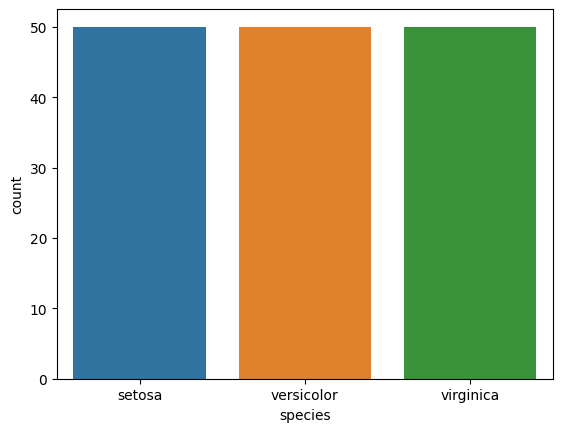

In [43]:
sns.countplot(x = 'species', data = df) # räknar antal unika värden i en kolumn
plt.show()

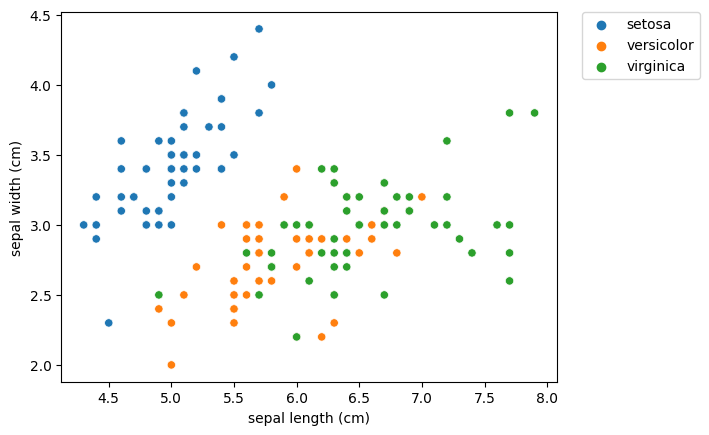

In [44]:
# vi kan ställa upp en scatterplot för att se hur de olika featuresen förhåller sig till varandra

sns.scatterplot(x = 'sepal length (cm)', y = 'sepal width (cm)', hue = 'species', data = df)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

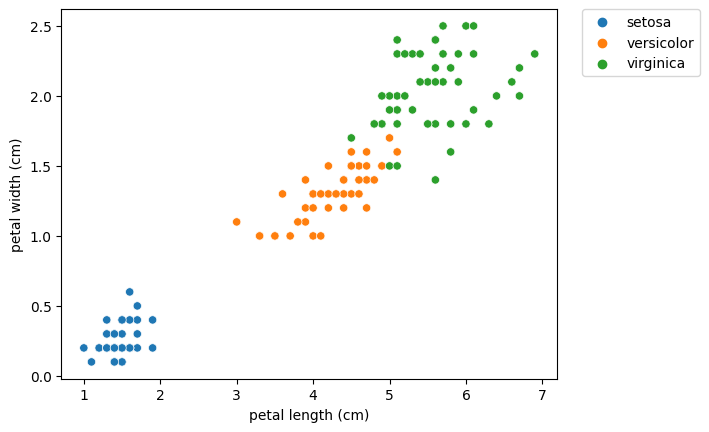

In [45]:
sns.scatterplot(x = 'petal length (cm)', y = 'petal width (cm)', hue = 'species', data = df)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

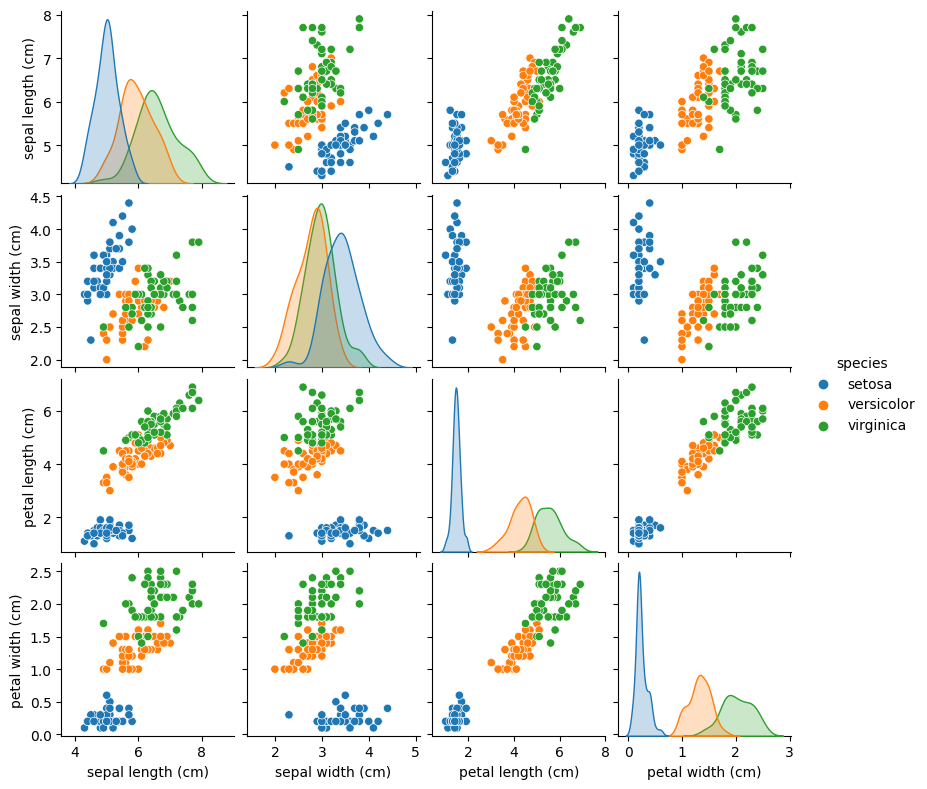

In [47]:
# vi vill inspektera alla möjligheter
# ett sätt är att använda sig av pairplot

sns.pairplot(df, hue = 'species', height=2)
plt.show()

(array([41.,  9.,  0., 15., 33., 18., 17., 17.]),
 array([0.1, 0.4, 0.7, 1. , 1.3, 1.6, 1.9, 2.2, 2.5]),
 <BarContainer object of 8 artists>)

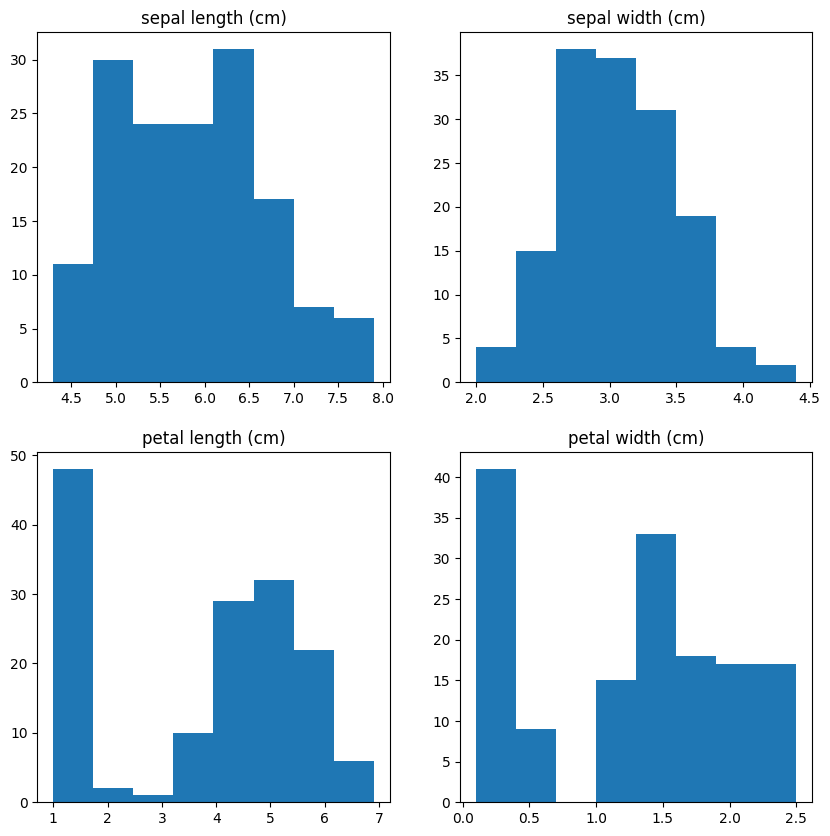

In [49]:
# mer visualisering

fig, axes = plt.subplots(2, 2, figsize=(10, 10))
axes[0, 0].set_title('sepal length (cm)')
axes[0, 0].hist(df['sepal length (cm)'], bins = 8)

axes[0, 1].set_title('sepal width (cm)')
axes[0, 1].hist(df['sepal width (cm)'], bins = 8)

axes[1, 0].set_title('petal length (cm)')
axes[1, 0].hist(df['petal length (cm)'], bins = 8)

axes[1, 1].set_title('petal width (cm)')
axes[1, 1].hist(df['petal width (cm)'], bins = 8)

In [52]:
corr_mat = df.corr(method='pearson') # visar korrelationen mellan alla features

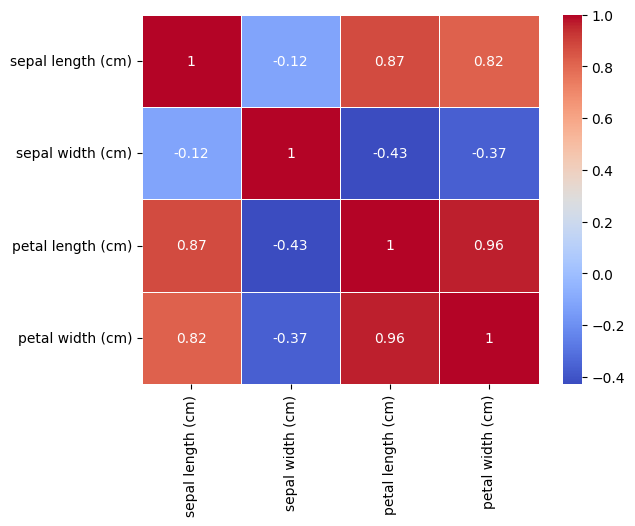

In [54]:
sns.heatmap(corr_mat, annot=True, cmap='coolwarm', linewidths=0.5) # visualiserar korrelationen mellan alla features
plt.show()